In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("/content/kidney_disease.csv")
data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


In [5]:
columns_to_retain = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']

In [6]:
def preprocess_data(data, columns_to_retain):
    data = data.drop([col for col in data.columns if col not in columns_to_retain], axis=1)
    data = data.dropna(axis=0)
    for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])
    return data

In [7]:
data = preprocess_data(pd.DataFrame(data), columns_to_retain)
data

<ipython-input-6-a21790b6fca4>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-6-a21790b6fca4>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-6-a21790b6fca4>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-6-a21790b6fca4>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-6-a21790b6fca4>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is dep

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,25,42,23,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,32,52,36,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,27,41,28,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,29,47,33,0,0,0,0,0,0,0


In [8]:
X = data.drop(['classification'],axis=1)
Y = data['classification']

In [9]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)
X[column_names]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,0.545455,0.333333,0.00,1.00,0.0,1.0,0.0,1.0,0.0,0.111905,...,0.551020,0.333333,0.600000,0.350,1.0,0.0,0.0,1.0,1.0,1.0
9,0.610390,0.666667,0.75,0.50,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.435374,0.242424,0.157143,0.300,1.0,1.0,0.0,1.0,0.0,1.0
11,0.740260,0.333333,0.25,0.75,0.0,0.0,0.0,1.0,0.0,0.738095,...,0.523810,0.333333,0.357143,0.325,1.0,1.0,0.0,1.0,1.0,0.0
14,0.805195,0.500000,0.25,0.75,0.4,1.0,0.0,1.0,1.0,0.207143,...,0.170068,0.000000,0.114286,0.050,1.0,1.0,1.0,1.0,1.0,0.0
20,0.714286,0.500000,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.245238,...,0.312925,0.121212,0.900000,0.175,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.636364,0.500000,0.75,0.00,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.857143,0.757576,0.600000,0.575,0.0,0.0,0.0,0.0,0.0,0.0
396,0.467532,0.333333,1.00,0.00,0.0,1.0,1.0,0.0,0.0,0.011905,...,0.911565,0.969697,0.742857,0.900,0.0,0.0,0.0,0.0,0.0,0.0
397,0.077922,0.500000,0.75,0.00,0.0,1.0,1.0,0.0,0.0,0.071429,...,0.863946,0.818182,0.585714,0.700,0.0,0.0,0.0,0.0,0.0,0.0
398,0.142857,0.166667,1.00,0.00,0.0,1.0,1.0,0.0,0.0,0.104762,...,0.755102,0.878788,0.671429,0.825,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [11]:
def ML_models(X_train,Y_train):

    decisionTree = DecisionTreeClassifier(criterion = "entropy" , random_state=0)
    decisionTree.fit(X_train,Y_train)

    randomForest = RandomForestClassifier(n_estimators = 10 , criterion = "entropy",random_state=0)
    randomForest.fit(X_train,Y_train)

    supportVectorMachine = SVC()
    supportVectorMachine.fit(X_train,Y_train)

    kNearestNeighbors= KNeighborsClassifier(n_neighbors=3)
    kNearestNeighbors.fit(X_train,Y_train)

    print('Decision Tree Classifier Training Accuracy : ',decisionTree.score(X_train,Y_train))
    print('Random Forest Classifier Training Accuracy : ',randomForest.score(X_train,Y_train))
    print('Support Vector Machine Training Accuracy : ',supportVectorMachine.score(X_train,Y_train))
    print('KNN Training Accuracy : ',kNearestNeighbors.score(X_train,Y_train))

    return decisionTree,randomForest,supportVectorMachine,kNearestNeighbors

In [12]:
models = ML_models(X_train,Y_train)

Decision Tree Classifier Training Accuracy :  1.0
Random Forest Classifier Training Accuracy :  1.0
Support Vector Machine Training Accuracy :  1.0
KNN Training Accuracy :  0.9920634920634921


In [13]:
results=[]
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']

    results.append({
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'support': support,
        'classification_report': report
    })

    print(f"Model {i}")
    print(confusion_matrix(Y_test, y_pred))
    print("Testing Accuracy =", accuracy)
    print(classification_report(Y_test, y_pred))

Model 0
[[20  0]
 [ 1 11]]
Testing Accuracy = 0.96875
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.98      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32

Model 1
[[20  0]
 [ 1 11]]
Testing Accuracy = 0.96875
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.98      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32

Model 2
[[20  0]
 [ 0 12]]
Testing Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12

    accuracy            

In [14]:
best_model_info = max(results, key=lambda x: (x['accuracy'], x['precision'], x['recall'], x['f1_score']))
best_model = best_model_info['model']
print("Best Model:")
print(best_model_info['model'])
print("Accuracy:", best_model_info['accuracy'])
print("Precision:", best_model_info['precision'])
print("Recall:", best_model_info['recall'])
print("F1-Score:", best_model_info['f1_score'])
print("Support:", best_model_info['support'])
print("Classification Report:")
print(best_model_info['classification_report'])

Best Model:
SVC()
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 32
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32}}


In [15]:
import pickle
with open('KDP_Model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [16]:
with open('KDP_Model.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [19]:
# columns_to_get = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']
columns_to_get =['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell','pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia']
def get_user_input():
    user_data = []
    print("Please enter the following values:")
    for column in columns_to_get:
        value = input(f"{column}: ")
        user_data.append(value)
    return pd.DataFrame(user_data)

In [21]:
def preprocess_user_data(user_data):
    for column in user_data.columns:
        if user_data[column].dtype == np.number:
            continue
        user_data[column] = LabelEncoder().fit_transform(user_data[column])

    scaler = MinMaxScaler()
    scaler.fit(user_data)
    user_data[user_data.columns] = scaler.transform(user_data)

    return user_data


user_dataset = get_user_input()
preprocessed_user_data = preprocess_user_data(user_dataset)
prediction = best_model.predict(preprocessed_user_data.transpose())
result = 'Positive for Kidney Disease' if prediction[0] == 1 else 'Negative for Kidney Disease'
print(f"The model predicts that you are: {result}")

Please enter the following values:
age: 20
blood_pressure: 80
specific_gravity: 4
albumin: 6
sugar: 2
red_blood_cells: 10
pus_cell: abnormal
pus_cell_clumps: present
bacteria: notpresent
blood_glucose_random: 117
blood_urea: 52
serum_creatinine: 63
sodium: 45
potassium: 2.3
haemoglobin: 1.3
packed_cell_volume: 9.6
white_blood_cell_count: 6700
red_blood_cell_count: 45
hypertension: yes
diabetes_mellitus: no
coronary_artery_disease: no
appetite: poor
peda_edema: yes
aanemia: no
The model predicts that you are: Positive for Kidney Disease


<ipython-input-21-0f9904bfd78a>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if user_data[column].dtype == np.number:
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Univariate

In [22]:
df = pd.read_csv("/content/kidney_disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [23]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [24]:
df.nunique()

id                400
age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                44
wc                 92
rc                 46
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [25]:
df.classification.value_counts()


classification
1    250
0    150
Name: count, dtype: int64

<Axes: >

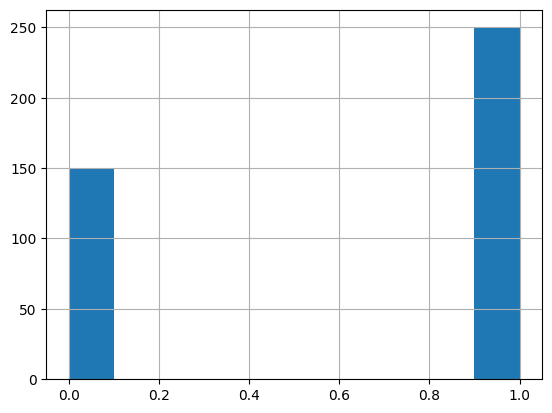

In [26]:
df.classification.hist()

<Axes: >

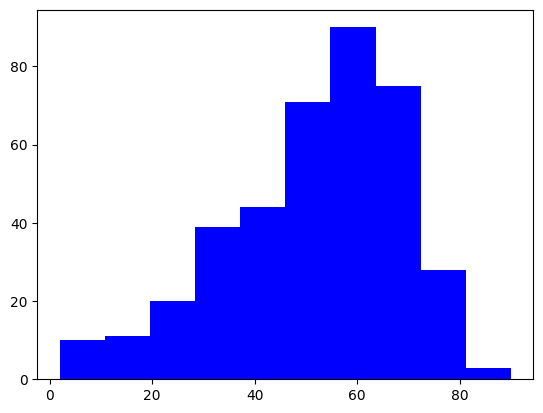

In [27]:
df.age.hist(color='blue', grid=False)


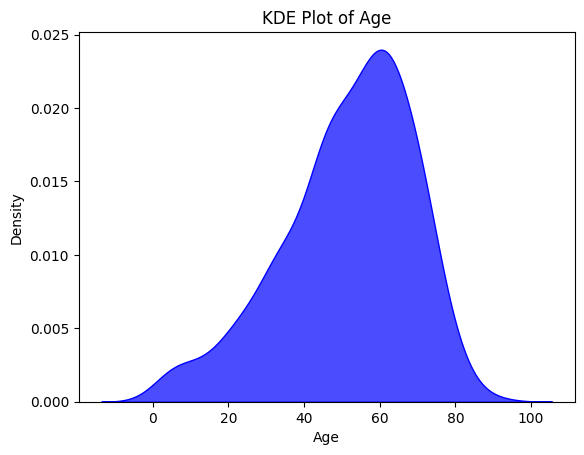

In [28]:
sns.kdeplot(df.age, fill=True, color='blue', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')

plt.show()

Bivariate

In [29]:
data1=df.dropna(axis=0)
from scipy import stats
r, p = stats.pearsonr(data1.al, data1.hemo)

In [30]:
r,p

(-0.7847450275727734, 3.1735543282288835e-34)

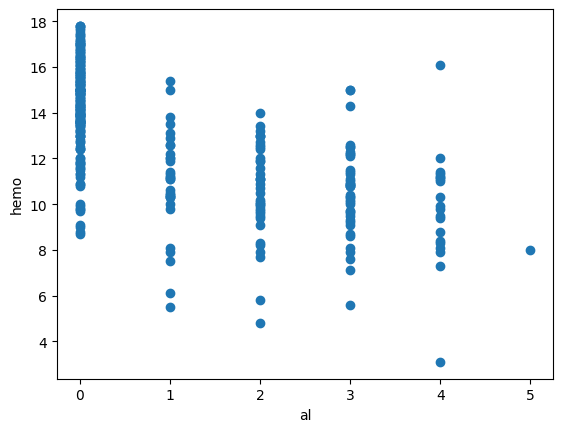

In [31]:
plt.scatter(df.al, df.hemo)

plt.xlabel('al')
plt.ylabel('hemo')
plt.show()

In [32]:
data.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,-0.147971,-0.188907,0.124032,0.068353,0.301915,...,-0.224766,-0.130596,-0.255283,0.372348,0.323957,0.269868,0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,-0.316670,-0.179834,0.206507,0.174555,0.190113,...,-0.313242,0.005469,-0.247835,0.334951,0.218096,0.257709,0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,0.500494,0.630323,-0.460050,-0.516392,-0.544781,...,0.634009,0.289477,0.629149,-0.648168,-0.639391,-0.379305,-0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,-0.489941,-0.752956,0.503341,0.516104,0.518123,...,-0.717364,-0.241334,-0.660120,0.796876,0.678582,0.374755,0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,-0.256568,-0.335901,0.177327,0.381929,0.730050,...,-0.378747,-0.062776,-0.381487,0.577286,0.591010,0.466658,0.220547,0.374128,0.179811,0.510615
rbc,-0.147971,-0.316670,0.500494,-0.489941,-0.256568,1.000000,0.498959,-0.168592,-0.273177,-0.493857,...,0.447349,0.195704,0.383699,-0.442400,-0.511777,-0.293269,-0.418639,-0.282868,-0.209797,-0.586391
pc,-0.188907,-0.179834,0.630323,-0.752956,-0.335901,0.498959,1.000000,-0.600092,-0.481227,-0.430646,...,0.665846,0.171335,0.664481,-0.666767,-0.636288,-0.384223,-0.528435,-0.606234,-0.545380,-0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,-0.168592,-0.600092,1.000000,0.415033,0.257768,...,-0.436269,-0.213087,-0.496111,0.432876,0.321900,0.352255,0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,-0.273177,-0.481227,0.415033,1.000000,0.318095,...,-0.411644,-0.160107,-0.346479,0.314961,0.367477,0.297063,0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,-0.493857,-0.430646,0.257768,0.318095,1.000000,...,-0.433909,-0.172519,-0.425190,0.579407,0.663012,0.459164,0.338924,0.336141,0.139854,0.591217


In [33]:
df_sampled = df.sample(2)

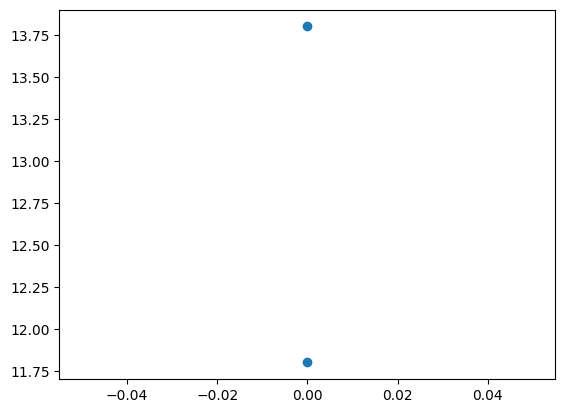

In [34]:
plt.scatter(df_sampled.al, df_sampled.hemo)

In [35]:
df_ckd = data[data['classification']== 1]
df_nonckd = data[data['classification']== 0]

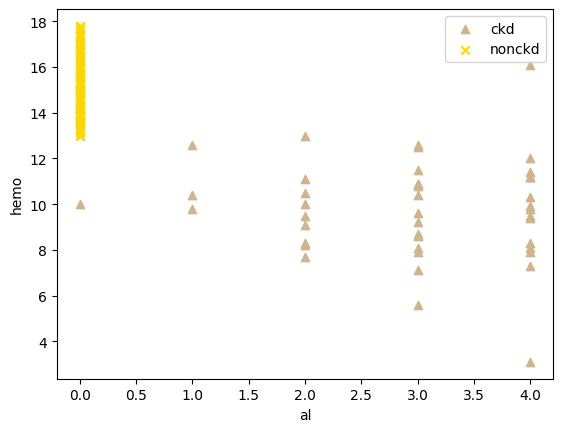

In [36]:
plt.scatter(df_ckd.al, df_ckd.hemo, marker='^', color='tan', label='ckd')
plt.scatter(df_nonckd.al, df_nonckd.hemo, marker='x', color='gold', label='nonckd')

plt.legend()
plt.xlabel('al')
plt.ylabel('hemo')
plt.show()

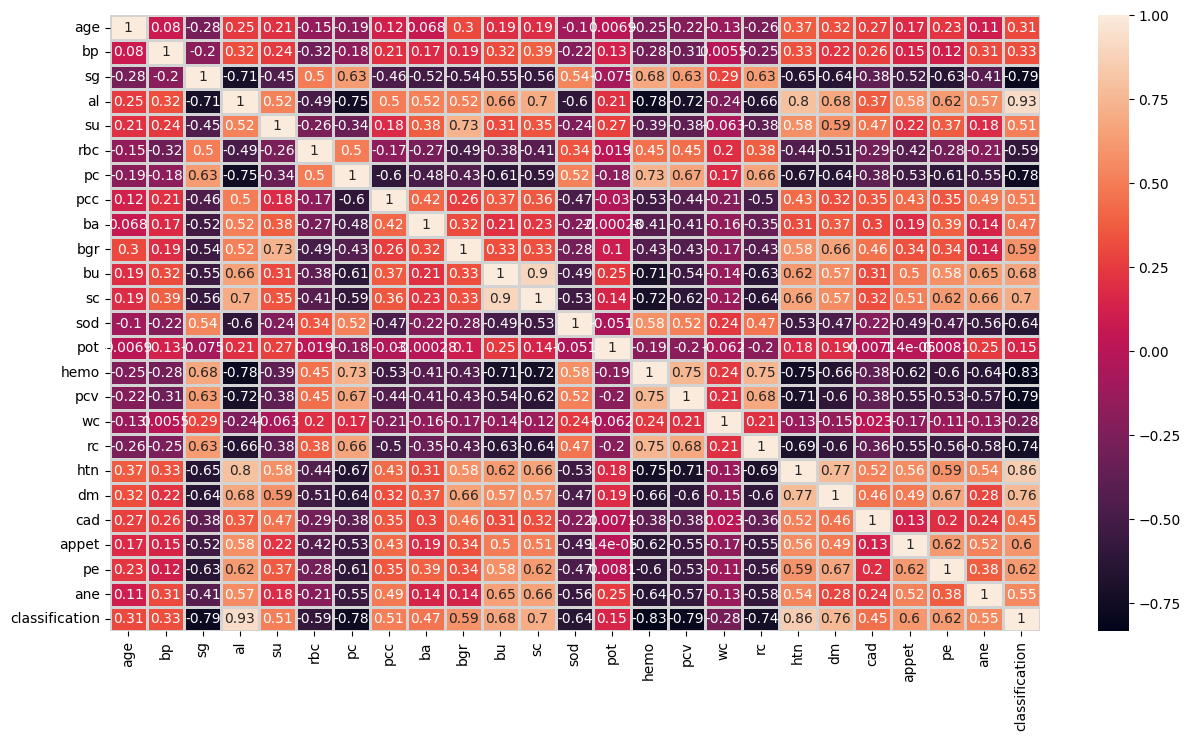

In [37]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

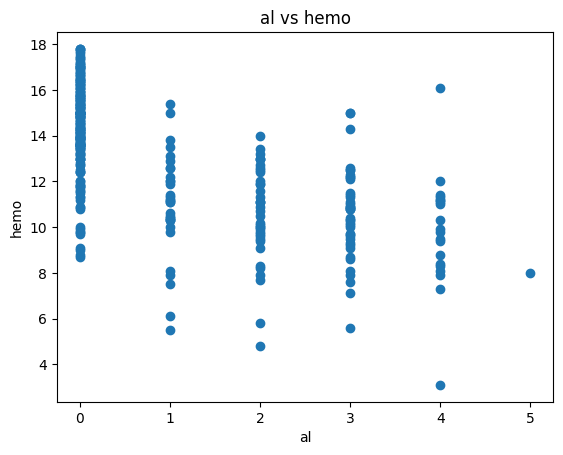

In [38]:
plt.scatter(df.al, df.hemo)

plt.title('al vs hemo')
plt.xlabel('al')
plt.ylabel('hemo')
plt.show()

In [39]:
stats.linregress(df.al, df.hemo)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

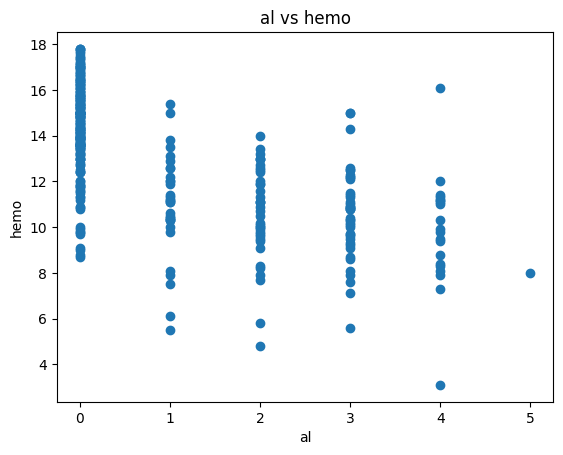

In [40]:
m, b, r, p, err = stats.linregress(df.al, df.hemo)

x = range(15, 53)
y = m * x + b

plt.plot(x, y, color='black')
plt.scatter(df.al, df.hemo)

plt.title('al vs hemo')
plt.xlabel('al')
plt.ylabel('hemo')
plt.show()